<h1><b>Tutorial: Demonstration of QCS Pipeline</b></h1>
<a id="tutorial"></a>

<p>This is tutorial for users for QCS Pipeline. This will go over background knowledge about MALDI-MSI and purpose of the novel Quality Control Standard and its pipeline for Batch Effect evaluation and correction.</p>

<p>Contents:</p>

1. Background Knowledge
2. Our Quality Control Standard Experiment
3. Instructions
4. Relative Standard Deviation
5. Intensity Plot
6. Violin Plot
7. PCA plot

<p>To run this tutorial, you can click run button for each cell or press <b>Shift + Enter</b> on your keyboard.</p>

<h2><b> Background Knowledge </b></h2>
<a id="background_knowledge"></a>

<p>Matrix-assisted laser desorption/ionization mass spectrometry imaging (MALDI-MSI) techniques allow us to perform spatial molecular profiling. Despite many successful applications in tumor classification and cancer biomarker discovery, its transition to clinical studies is challenged due to a lack of control of technical variation. To address this, we introduced a novel quality control standard to account for variability caused by sample preparation and instrument performance.</p>

<h2><b> Our Quality Control Standard Experiment </b></h2>
<a id="quality_control_experiment"></a>
<p>The study by "Luo's Paper" proposed a novel Quality Control Standard (QCS) to control the variation caused by sample preparation and instrument performance in matrix-assisted laser desorption/ionization mass spectrometry imaging (MALDI-MSI).</p>

<p>Our Quality Control Standard experiment consists of three-day MALDI-MSI experiment using 18 slides with 3 tissue types.</p>

<p>After performing MALDI-MSI experiment, SCiLS Lab software was used to process the MALDI-MSI data. Raw data files from each batch in the experiment were imported into one file and processed with baseline subtraction. The final feature tables, including both QCS features and tissue features, were then exported in two formats. For Pipeline #1, the final feature table only contained QCS features; however, for Pipeline #2, the final feature table needed to include both QCS and tissue features.</p>

<h2><b>Instructions</b></h2>
<a id="instructions"></a>

<h3><b>1. Upload your peak dataset</b></h3> 
<p>The peak dataset from MALDI-MSI data should contain tissue feature and/or Quality Control Standard (QCS) features in two formats: no normalization and Total Ion Count (TIC) normalization.</p>

<p>You need to upload a total of three CSV files:</p>

<p><b>No normalization dataset:</b> This CSV file contains peak data of without any normalization. It should be directly obtained from SCiLS Lab software and exported as CSV file.</p>

<p><b>TIC normalization dataset:</b> This CSV file contains peak data with Total Ion Count (TIC) normalization. It should also be directly obtained from SCiLS Lab software and exported as a CSV file.</p>

<p><b>Batch information:</b> This CSV file includes batch information for the samples, with one column for the sample name, one for the injection order, and one for the batch number.</p>

<p>To upload the CSV files, place them into the "input" folder. You can drag the files into the folder ssection labeled "input". To access these files in the notebook, you would call them in a coding cell as shown below.</p>

<h3><b>1.1 Accessing the CSV files</b></h3>
<p>You can place the file path inside the quotation marks (""). To copy the file path, right-click the file and select "Copy File Path."</p>

In [3]:
# Accessing the CSV files #
no_normalization_data_1 <- read.csv("input/no_normalization_dataset.csv", ## change file path ##
                                  header = FALSE,
                                  check.names = FALSE,
                                  stringsAsFactors = FALSE)

TIC_normalization_data_1 <- read.csv("input/tic_normalization_dataset.csv", ## change file path ##
                                   header = FALSE,
                                   check.names = FALSE,
                                   stringsAsFactors = FALSE) 

batch_info_1 <- read.csv("input/batch_info.csv", ## change file path ##
                       header = TRUE,
                       check.names = FALSE,
                       stringsAsFactors = FALSE) 

<p>You can check the csv files how they look</p>

In [4]:
head(no_normalization_data_1)
head(TIC_normalization_data_1)
head(batch_info_1)

,V1
,<chr>
1,# Exported with SCiLS Lab Version 12.01.16059
2,# Export time: 2024-04-26 11:04:01
3,# Generated from file: V:\Instruments\Gobi\Vandenbosch_Michiel\Luojiao\20240405_QCSTissue_Day1\20240405_day1-3_BaselineRemoval.slx
4,# Object Full Name: All Features
5,# Object ID: afad0ade-9e2e-43bb-9aea-72ec417ef666
6,# Object type: Static feature list


,V1
,<chr>
1,# Exported with SCiLS Lab Version 12.01.16059
2,# Export time: 2024-04-26 11:06:48
3,# Generated from file: V:\Instruments\Gobi\Vandenbosch_Michiel\Luojiao\20240405_QCSTissue_Day1\20240405_day1-3_BaselineRemoval.slx
4,# Object Full Name: All Features
5,# Object ID: afad0ade-9e2e-43bb-9aea-72ec417ef666
6,# Object type: Static feature list


,sample.name,injection.order,batch
,<chr>,<int>,<int>
1,Peak area - S10_GoatLiver_4 - Total Ion Count,64,2
2,Peak area - S10_QCS_1 - Total Ion Count,65,2
3,Peak area - S10_QCS_2 - Total Ion Count,66,2
4,Peak area - S10_QCS_3 - Total Ion Count,67,2
5,Peak area - S10_QCS_4 - Total Ion Count,68,2
6,Peak area - S10_QCS_5 - Total Ion Count,69,2


<h3><b>1.2 Adding m/z Value for Propranolol, Internal Standard, and Sample Names</b></h3>
<p>To proceed with data analysis from the peak data file, we need the mass-to-charge ratios (m/z) of propranolol (the target molecule) and d7-propranolol (the internal standard). Additionally, we require the naming conventions used for your tissue samples (for Pipeline #2). Please provide tihs information in the cell below.</p>

In [8]:
# Asking user for m/z values
propranolol_mz_value_1 <- as.numeric(readline("Please enter Propranolol m/z value (ex: 260.186): "))
d7_propranolol_mz_value_1 <- as.numeric(readline("Please enter D7-propranolol m/z value (ex: 267.187): "))

# Asking user to input sample names
sample_input <- readline("Please enter sample names (capitalization matters), separated by commas (ex: ChickenHeart, ChickenLiver, GoatLiver): ")

# Splitting the input string into a vector of sample names
sample_set_1 <- unlist(strsplit(sample_input, split = ","))

# Trim any leading/trailing white space from sample names
sample_set_1 <- trimws(sample_set_1)

Please enter Propranolol m/z value (ex: 260.186):  260.186
Please enter D7-propranolol m/z value (ex: 267.187):  267.187
Please enter sample names (capitalization matters), separated by commas (ex: ChickenHeart, ChickenLiver, GoatLiver):  ChickenHeart, ChickenLiver, GoatLiver


<h3><b>1.3 Preprocessing the data files (making into data frames)</b></h3>
<p>After providing all the necessary data files and information, we can now make raw CSV file into organized data frame for further data analysis. We will make a data frame for no normalization data file.</p>

In [13]:
### Making formatted table no_normalization ###
# Read the CSV file
rawdata <- no_normalization_data_1
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data into datalist
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names as mz 
colnames(combined_batch_data_df) <- c("mz", peak_header)

# make name column (will be same as mz column)
combined_batch_data_df$name <- combined_batch_data_df$mz 

# Set 'rt' column to a constant value
combined_batch_data_df$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df <- combined_batch_data_df[, c("name", "mz", "rt", peak_header)]

# check if each sample set exist in columns
sample_set_exist <- logical(length(sample_set_1))

# Check if each sample set exists in any of the column names
for (i in seq_along(sample_set_1)) {
  sample_set_exist[i] <- any(grepl(sample_set_1[i], colnames(combined_batch_data_df)))
}

# Identify sample sets that do not exist in any column names
missing_sample_sets <- sample_set_1[!sample_set_exist]

if (length(missing_sample_sets) > 0) {
  message("Error: The following sample sets do not exist in any column names: ", paste(missing_sample_sets, collapse = ", ", "check your sample_set"))
} else {
  message("Successfully made formatted table. All sample sets exist in at least one column name.")
}

# Check if m/z values exist in rows
propranolol_mz_exist <- any(combined_batch_data_df$mz == propranolol_mz_value_1)
d7_propranolol_mz_exist <- any(combined_batch_data_df$mz == d7_propranolol_mz_value_1)

# Print messages based on existence
if (!propranolol_mz_exist) {
  message("Error: The propranolol m/z value ", propranolol_mz_value_1, " does not exist in any row.")
} else {
  message("The propranolol m/z value ", propranolol_mz_value_1, " exists in at least one row.")
}

if (!d7_propranolol_mz_exist) {
  message("Error: The D7-propranolol m/z value ", d7_propranolol_mz_value_1, " does not exist in any row.")
} else {
  message("The D7-propranolol m/z value ", d7_propranolol_mz_value_1, " exists in at least one row.")
}

# uncomment to check if combined_batch_data_df looks correct and if sample names are correct
#print(combined_batch_data_df)
#print(colnames(combined_batch_data_df))


## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_transposed <- as.data.frame(t(combined_batch_data_df[, -(1:3)]))
colnames(combined_batch_data_df_transposed) <- combined_batch_data_df[, 1]
combined_batch_info_data <- cbind(batch_info_1[,-1], combined_batch_data_df_transposed) 

cat("\033[1mSuccessfully formmated no normalized datasets (check dataset folder)\033[0m\n")

Successfully made formatted table. All sample sets exist in at least one column name.

The propranolol m/z value 260.186 exists in at least one row.

The D7-propranolol m/z value 267.187 exists in at least one row.



Successfully formmated no normalized datasets (check dataset folder)


<p>You can check how the no normalization data frame looks like below.</p>

In [14]:
head(combined_batch_data_df)
head(combined_batch_data_df_transposed)

,name,mz,rt,Peak area - S10_GoatLiver_4 - No Normalization,Peak area - S10_QCS_1 - No Normalization,Peak area - S10_QCS_2 - No Normalization,Peak area - S10_QCS_3 - No Normalization,Peak area - S10_QCS_4 - No Normalization,Peak area - S10_QCS_5 - No Normalization,Peak area - S10_QCS_6 - No Normalization,⋯,Peak area - S8_QCS_4 - No Normalization,Peak area - S8_QCS_5 - No Normalization,Peak area - S8_QCS_6 - No Normalization,Peak area - S9_ChickenHeart_4 - No Normalization,Peak area - S9_QCS_1 - No Normalization,Peak area - S9_QCS_2 - No Normalization,Peak area - S9_QCS_3 - No Normalization,Peak area - S9_QCS_4 - No Normalization,Peak area - S9_QCS_5 - No Normalization,Peak area - S9_QCS_6 - No Normalization
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,260.186,260.186,666,14.827036857605,154.73277282715,134.63302612305,64.038848876953,50.788349151611,63.819240570068,133.96676635742,⋯,106.48139953613,105.47265625,197.11683654785,11.303610801697,137.51699829102,129.28141784668,79.399871826172,67.644439697266,73.310455322266,123.85231018066
2,267.187,267.187,666,7.9957051277161,109.94213867188,114.89065551758,54.934944152832,41.226715087891,53.161575317383,122.41677093506,⋯,66.912094116211,68.623329162598,117.61213684082,9.2066535949707,110.75361633301,99.984580993652,59.006370544434,46.236461639404,44.162284851074,96.437171936035
3,102.152,102.152,666,8.456127166748,38.831100463867,39.90406036377,44.353145599365,38.180728912354,35.44603729248,35.563106536865,⋯,29.073619842529,28.655408859253,27.089416503906,8.7944612503052,29.898481369019,29.759325027466,31.891660690308,25.473917007446,25.649877548218,24.49610710144
4,104.146,104.146,666,876.1396484375,38.12748336792,39.39644241333,24.738611221313,22.38010597229,22.416402816772,45.60143661499,⋯,21.846477508545,21.028102874756,33.612468719482,742.7548828125,28.722188949585,30.345556259155,17.806486129761,16.846061706543,16.762172698975,28.880819320679
5,116.105,116.105,666,15.821979522705,23.18222618103,23.999359130859,24.113695144653,22.572780609131,22.661245346069,24.604742050171,⋯,23.133222579956,23.483551025391,23.879577636719,9.0998506546021,23.941709518433,24.340131759644,22.133455276489,18.98217010498,17.816650390625,22.250228881836
6,118.148,118.148,666,21.13260269165,21.486028671265,21.267709732056,15.796621322632,14.168371200562,14.905500411987,20.919412612915,⋯,17.860466003418,17.264507293701,22.340091705322,19.037448883057,24.632562637329,25.767854690552,19.111297607422,16.220561981201,15.986663818359,21.456390380859


,260.186,267.187,102.152,104.146,116.105,118.148,120.141,132.125,140.122,147.12,⋯,853.6,879.65,881.65,882.65,895.6,897.6,905.7,907.7,921.6,923.6
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Peak area - S10_GoatLiver_4 - No Normalization,14.827036857605,7.9957051277161,8.456127166748,876.1396484375,15.821979522705,21.13260269165,5.8353643417358,55.064254760742,17.692844390869,62.822532653809,⋯,12.553977966309,7.7122402191162,7.9604778289795,8.3025407791138,8.6267490386963,8.835542678833,7.7630624771118,7.6005444526672,7.5755143165588,7.9037637710571
Peak area - S10_QCS_1 - No Normalization,154.73277282715,109.94213867188,38.831100463867,38.12748336792,23.18222618103,21.486028671265,9.1098861694336,27.640802383423,22.355625152588,64.79256439209,⋯,10.895347595215,7.6447262763977,7.1884317398071,6.8475222587585,10.96934223175,13.281335830688,7.7956137657166,7.7990827560425,7.7211871147156,7.9797353744507
Peak area - S10_QCS_2 - No Normalization,134.63302612305,114.89065551758,39.90406036377,39.39644241333,23.999359130859,21.267709732056,9.279577255249,28.400815963745,23.248569488525,63.492492675781,⋯,10.732488632202,7.5876994132996,7.2337775230408,6.9184470176697,11.309983253479,12.941691398621,7.7971849441528,7.6534996032715,7.6630349159241,7.9565496444702
Peak area - S10_QCS_3 - No Normalization,64.038848876953,54.934944152832,44.353145599365,24.738611221313,24.113695144653,15.796621322632,9.9432697296143,22.795629501343,22.099645614624,65.254402160645,⋯,11.477709770203,7.7631006240845,7.3691992759705,7.2017078399658,12.575326919556,13.864718437195,7.9478302001953,8.2206230163574,7.9513311386108,8.2255439758301
Peak area - S10_QCS_4 - No Normalization,50.788349151611,41.226715087891,38.180728912354,22.38010597229,22.572780609131,14.168371200562,9.316234588623,21.103340148926,20.089111328125,60.303447723389,⋯,11.042229652405,7.5547652244568,7.1495966911316,6.7954444885254,11.335593223572,13.08895111084,7.505530834198,7.7813248634338,7.4651556015015,7.415491104126
Peak area - S10_QCS_5 - No Normalization,63.819240570068,53.161575317383,35.44603729248,22.416402816772,22.661245346069,14.905500411987,9.1327085494995,21.680807113647,20.262670516968,61.031593322754,⋯,10.830234527588,7.6396751403809,7.2990746498108,6.7997045516968,10.851528167725,13.468605995178,7.3750429153442,7.4962253570557,7.1930384635925,7.3991351127625


<h2><b>Relative Standard Deviation (RSD)</b></h2>
<p>For the initial data analysis in batch effect evaluation, we will calculate Relative Standard Deviation (RSD) to assess the variation in both the Quality Control Standard and tissue features. RSD is determined by dividing the standard deviation of the feature abundance by the mean, and it is expressed as a percentage</p>

<p>This is the equation for Relative Standard Deviation:</p> $$ RSD = \left( \frac{\text{Standard Deviation}}{\text{Mean}} \right) \times 100 $$

In [16]:
## run these functions first ##

# 1: Function to extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}
# 2. Function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# 3. Function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 3))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 3)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}
## No Normalization RSD ##
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data, sample_set_1)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value_1, drop = FALSE]
propranolol_data <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value_1, drop = FALSE]
d7_propranolol_data <- cbind(batch_info_columns, d7_propranolol_peak_data)

# usage:
rsd_propranolol <- calculate_batch_rsd(propranolol_data, propranolol_mz_value_1)
cat("\033[1mSucessfully calculated RSD (propranolol) for no normalized dataset.\033[0m\n")
cat("m/z value:", propranolol_mz_value_1, "\n")
print(rsd_propranolol)
                           
rsd_d7_propranolol <- calculate_batch_rsd(d7_propranolol_data, d7_propranolol_mz_value_1)
cat("\033[1mSucessfully calculated RSD (d7_propranolol) for no normalized dataset.\033[0m\n")
cat("m/z value:", d7_propranolol_mz_value_1, "\n")
print(rsd_d7_propranolol)

Sucessfully calculated RSD (propranolol) for no normalized dataset.
m/z value: 260.186 
       Batch     RSD
1 Intraday 1   70.5%
2 Intraday 2 41.414%
3 Intraday 3 34.072%
4   Interday 52.048%
Sucessfully calculated RSD (d7_propranolol) for no normalized dataset.
m/z value: 267.187 
       Batch     RSD
1 Intraday 1 73.808%
2 Intraday 2 39.711%
3 Intraday 3 35.566%
4   Interday 53.147%


<p>Now, we have calculated the Relative Standard Deviation (RSD) of the Quality Control Standard (QCS) samples both within and between batches. Following the three-day MALDI-MSI experiment, the <b>Intraday 1 RSD</b> represents the coefficient of variation (CV) of the QCS samples in the Day 1 batch, which includes QCS samples 1 through 6. If the Intraday 1 RSD is 70.5%, it indicates that the QCS sample peak data is experiencing a significant batch effect, as reflected by the high CV value.</p>

<h2><b>Intensity Plot</b></h2>
<p>We have calculated the variation in the QCS samples using the non-normalized dataset and observed a high variance across the QCS samples in the three-day MALDI-MSI experiment. Next, we will create an intensity plot to visualize this batch effect in the QCS samples. Intensity plots provide a visual representation of the distribution of ion intensities across or within samples, allowing users to observe trends in systematic variations between batches in the MALDI-MSI experiment. Thus, now we will try to make intensity plot for no normalized dataset to visualize the systematic batch effect occuring in QCS samples.</p>

Red dotted line represents mean intensity (mean(scaled_intensity)). Black dotted lines represent standard deviation.(mean - std)


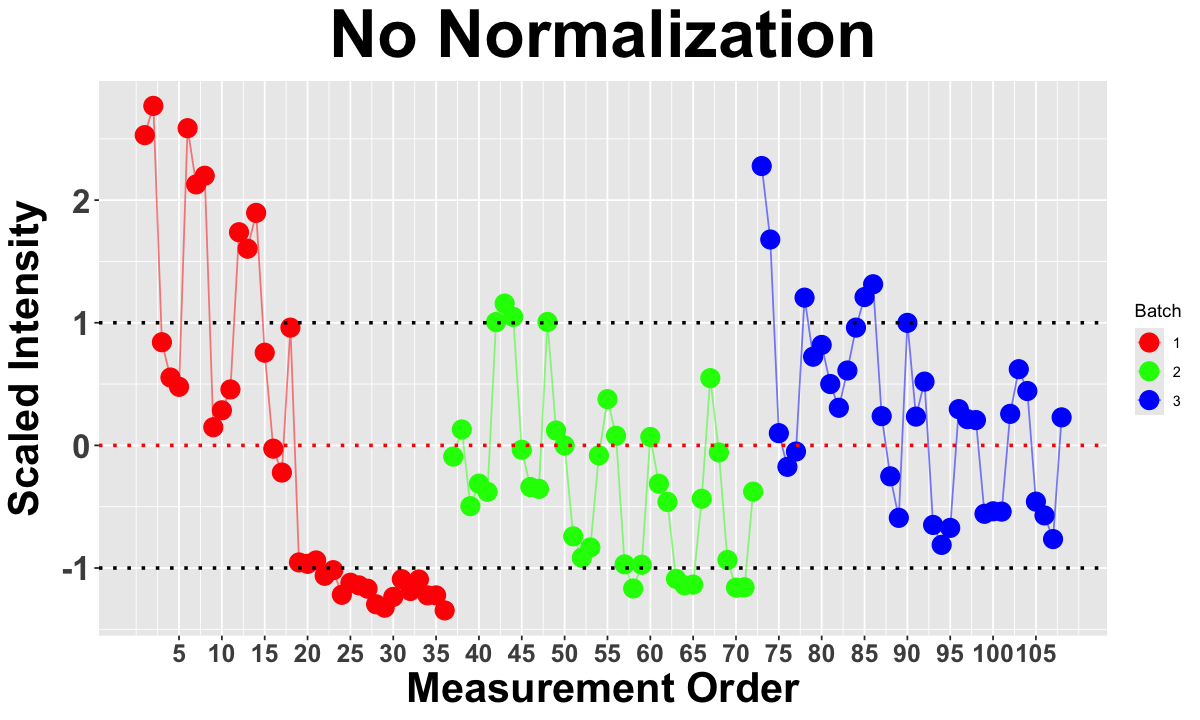

In [17]:
# Intensity Plot (Intensity vs Measurement Order) #

# load libraries #
library(RColorBrewer)
library(ggplot2)

# Functions #
# extract only qcs
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

## No Normalization Dataset ##
# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data, sample_set_1)

# ordering by batch then s_value
qcs_batch_info_data_ordered <- qcs_batch_info_data[order(qcs_batch_info_data$batch), ]
batch <- qcs_batch_info_data_ordered$batch

# extract s_value
row_names_qcs <- rownames(qcs_batch_info_data_ordered)
s_values <- as.numeric(sub(".*S(\\d+).*", "\\1", row_names_qcs))

qcs_batch_info_data_ordered$S <- s_values
qcs_batch_info_data_ordered <- qcs_batch_info_data_ordered[order(qcs_batch_info_data_ordered$batch, qcs_batch_info_data_ordered$S), ]

propranolol_intensity <- qcs_batch_info_data_ordered[,colnames(qcs_batch_info_data_ordered) == propranolol_mz_value_1, drop = FALSE]
propranolol_intensity_values <- as.numeric(unlist(propranolol_intensity))
propranolol_intensity <- scale(propranolol_intensity_values)

# intensity plot based on measurement_order
qcs_batch_info_data_ordered$measurement_order <- seq_len(nrow(qcs_batch_info_data_ordered))

plot_data_scaled <- data.frame(
  Measurement_order = qcs_batch_info_data_ordered$measurement_order,
  Batch = qcs_batch_info_data_ordered$batch,
  Intensity = propranolol_intensity
)

mean_intensity <- mean(plot_data_scaled$Intensity)
sd_intensity <- sd(plot_data_scaled$Intensity)
batch_unique <- unique(plot_data_scaled$Batch)
cat("\033[1mRed dotted line represents mean intensity (mean(scaled_intensity)). Black dotted lines represent standard deviation.(mean - std)\033[0m\n")

# setting colors
custom_colors <- c("1" = "red", "2" = "green", "3" = "blue") 

# Get the unique batch numbers
unique_batches <- unique(plot_data_scaled$Batch)

# Check if there are more than 3 unique batches
if (length(unique_batches) > 3) {
  additional_batches <- setdiff(unique_batches, names(custom_colors))
  # Generate additional colors using RColorBrewer palette
  additional_colors <- brewer.pal(length(additional_batches), "Set3")
  # Combine custom colors with additional colors
  all_colors <- c(custom_colors, setNames(additional_colors, additional_batches))
} else {
  all_colors <- custom_colors
}

# Create the intensity plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
intensity_plot <- ggplot(plot_data_scaled, aes(x = Measurement_order, y = Intensity, color = factor(Batch))) +
  geom_point(size = 5) +  # Points colored by Batch
  geom_line(aes(group = Batch), alpha = 0.5) +  # Lines grouped by Batch
  geom_hline(yintercept = mean_intensity, linetype = "dotted", color = "red", linewidth = 1) +  # Red dotted line for mean
  geom_hline(yintercept = mean_intensity + sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Black dotted line for mean + SD
  geom_hline(yintercept = mean_intensity - sd_intensity, linetype = "dotted", color = "black", linewidth = 1) +  # Black dotted line for mean - SD
  labs(x = "Measurement Order", y = "Scaled Intensity", color = "Batch") +  # Axis labels
  scale_x_continuous(breaks = seq(5, max(plot_data_scaled$Measurement_order), by = 5)) +  # X-axis breaks
  scale_color_manual(values = all_colors) +  # Color scale
  ggtitle("No Normalization") +
  theme(
    plot.title = element_text(size = 40, hjust = 0.5, face = "bold"),  
    axis.title.x = element_text(size = 25, face = "bold"), 
    axis.title.y = element_text(size = 25, face = "bold"),  
    axis.text.x = element_text(size = 15, face = "bold"), 
    axis.text.y = element_text(size = 20, face = "bold")  
  )
print(intensity_plot)

<p>The intensity plot displays scaled peak intensity on the y-axis and measurement order on the x-axis, with the peak intensities of the QCS samples scattered across the plot. Different colors represent the batches for each experiment day, such as Day 1, Day 2, and Day 3. The black dotted lines indicate the standard deviation from the mean, while the red dotted line represents the overall mean of the samples. As shown, the peak intensity decreases from the Day 1 batch, highlighting significant variance between samples across the three days.</p>

<h2><b>Violin Plot</b></h2>

<p>Violin plot is also used for assessing batch effects in MALDI-MSI as it provids visualization of the systematic batch occuring in QCS samples. The width of the violin represents the frequency of data points at each intensity level to show the distribution shape. Areas of high density of sample are wider which allows identification of wheree most data points cluster. Thus, the changes in the width of the violin between batches can reveal differences in data variability which are due to batch effects. Now, we will make violin plot for no normalized dataset.</p> 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Gray dotted line represents median


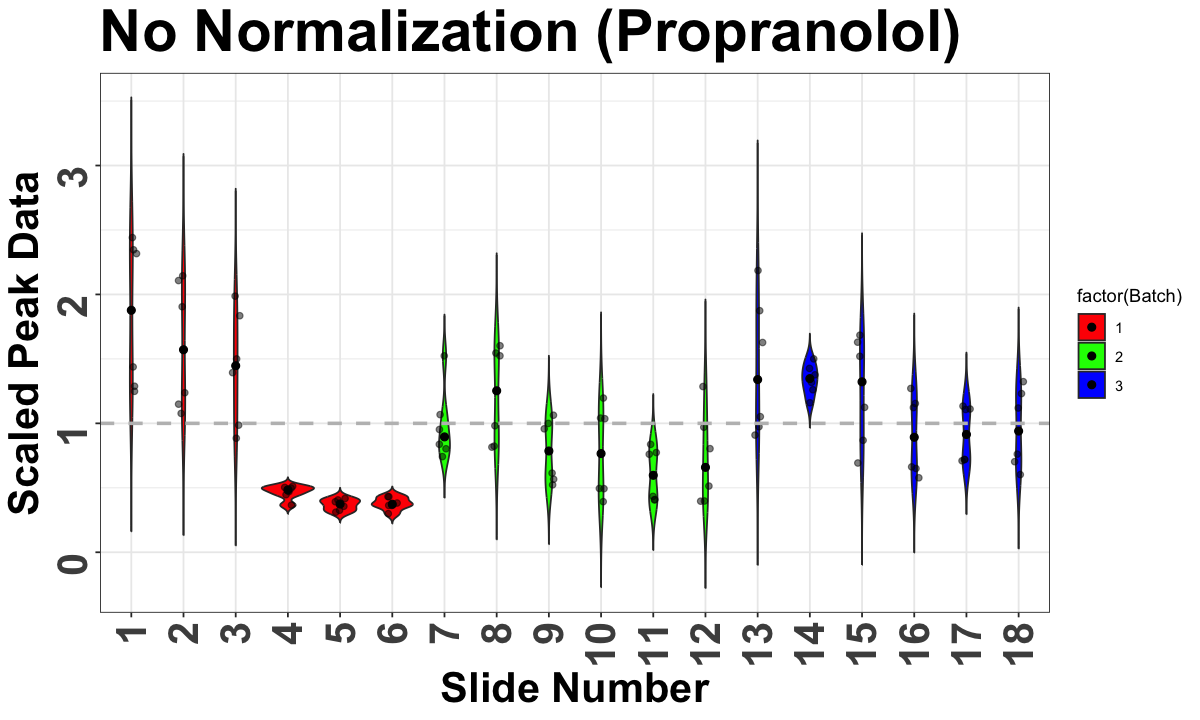

In [18]:
## Violin Plot ##

# Load library
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Function to scale data by its mean
scale_by_mean <- function(data_frame) {
  mean_value <- mean(data_frame$Value)
  data_frame <- data_frame %>%
    mutate(Value = Value / mean_value)
  return(data_frame)
}

# No Normalization Dataset #
# Transform and prepare the dataset
propranolol_data_trans <- as.data.frame(t(propranolol_data))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Scale No Normalization data by its mean
violin_data <- scale_by_mean(violin_data)

# Define the colors for the first three batches
manual_colors <- c("1" = "red", "2" = "green", "3" = "blue")

# Plot function to ensure consistent scaling
plot_violin <- function(data, title) {
  unique_batches <- unique(data$Batch)
  additional_batches <- setdiff(unique_batches, names(manual_colors))
  
  if (length(additional_batches) > 0) {
    additional_colors <- colorRampPalette(brewer.pal(9, "Set3"))(length(additional_batches))
    additional_colors <- setNames(additional_colors, additional_batches)
  } else {
    additional_colors <- c()
  }
  
  all_colors <- c(manual_colors, additional_colors)
  
  ggplot(data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
    geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
    stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
    geom_point(position = position_jitter(width = 0.1), alpha = 0.5) + 
    geom_hline(yintercept = 1, linetype = "dashed", color = "gray", linewidth = 1) +
    scale_fill_manual(values = all_colors) +
    labs(x = "Slide Number", y = "Scaled Peak Data", title = title) +
    theme_bw() +
    theme(

      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold", size = 25),
      axis.title = element_text(face = "bold", size = 25),  
      plot.title = element_text(face = "bold", size = 35),  
      axis.text = element_text(size = 20)
    )
}

# Plot the data with each dataset scaled by its mean
cat("\033[1mGray dotted line represents median\033[0m\n")
options(repr.plot.width = 10, repr.plot.height = 6)

# No Normalization Plot
violin_plot_jit <- plot_violin(violin_data, "No Normalization (Propranolol)")
print(violin_plot_jit)

<p>From the violin plot, we can observe that the violins are very narrow, indicating high variability within each batch. The black dots represent individual sample intensities, while the gray dotted line marks the overall mean intensity. Additionally, we can see a significant drop in peak intensity for slides 4 to 6 during the first day of the MALDI-MSI experiment compared to other samples.</p>

<h2><b>Principal Component Analysis (PCA) plots</b></h2>
<p>PCA plots are used to assess batch effects by reducing high-dimensional data into a few principal components that capture the most variance, enabling visualization of complex datasets in 2D plots. With PCA, we can observe sample clustering based on their similarities, allowing for a clear comparison of data structure before and after batch effect correction. First, we will examine the PCA plot of the non-normalized dataset and compare it to the TIC-normalized dataset to observe changes in data structure. Additionally, we can further analyze sample clustering at both intra-group and inter-group levels, as well as for QCS samples exclusively.</p>

<h3><b>1.1 PCA Plot</b></h3>

PCA plot for no normalization dataset
Total Score: 80.58 %

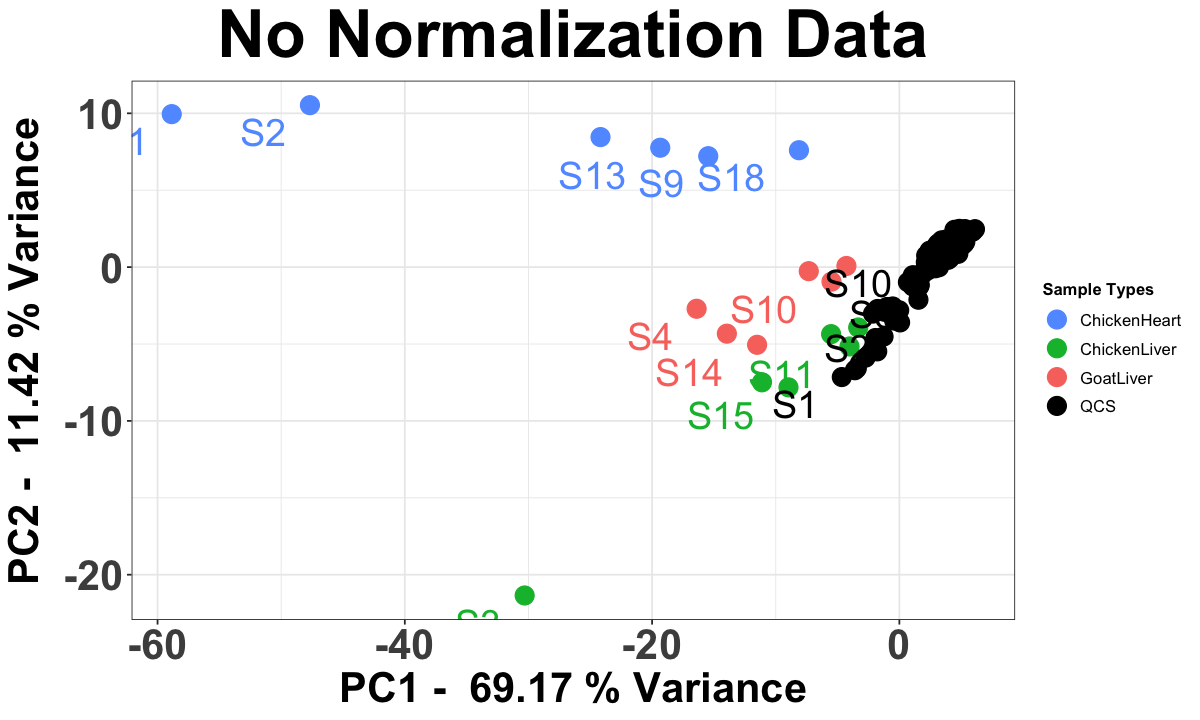

In [27]:
## PCA plot ##
# no norm #
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# Format PCA plot 
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
cat("\033[1mPCA plot for no normalization dataset\033[0m\n")

# Convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df %>%
  mutate_all(as.numeric)

# Extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_1, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types <- str_extract(colnames(batch_matrix), pattern)
sample_types[is.na(sample_types)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data <- data.frame(Sample = sample_ID, batch_pca$x)

# Plot PCA with colored sample dots based on sample type
pca_data$Score <- pca_data$PC1 + pca_data$PC2
pca_data$Type <- sample_types

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca$sdev[1]^2
pc2_score <- batch_pca$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types[sample_types != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# PCA plot
plot <- ggplot(pca_data, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("No Normalization Data") +
  labs(color = "Sample Types") + 
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    # these are here for editing plot title, text, axis title and more  
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  )

print(plot)

<p>From the PCA plot of the no normalized dataset, we can see that the chicken heart samples are clearly separated from the other samples, while the QCS, chicken liver, and goat liver samples are clustered together. This separation occurs because, biologically, the chicken heart is more distinct from the chicken liver and goat liver.</p>

<p>Now, we will compare the no normalized data to TIC normalized data to visualize how data structure has changed by the batch effect correction.</p>

Sucessfully formatted TIC normalized datasets (check dataset folder).
PCA plot for TIC normalization dataset
Total Score: 86.3 %

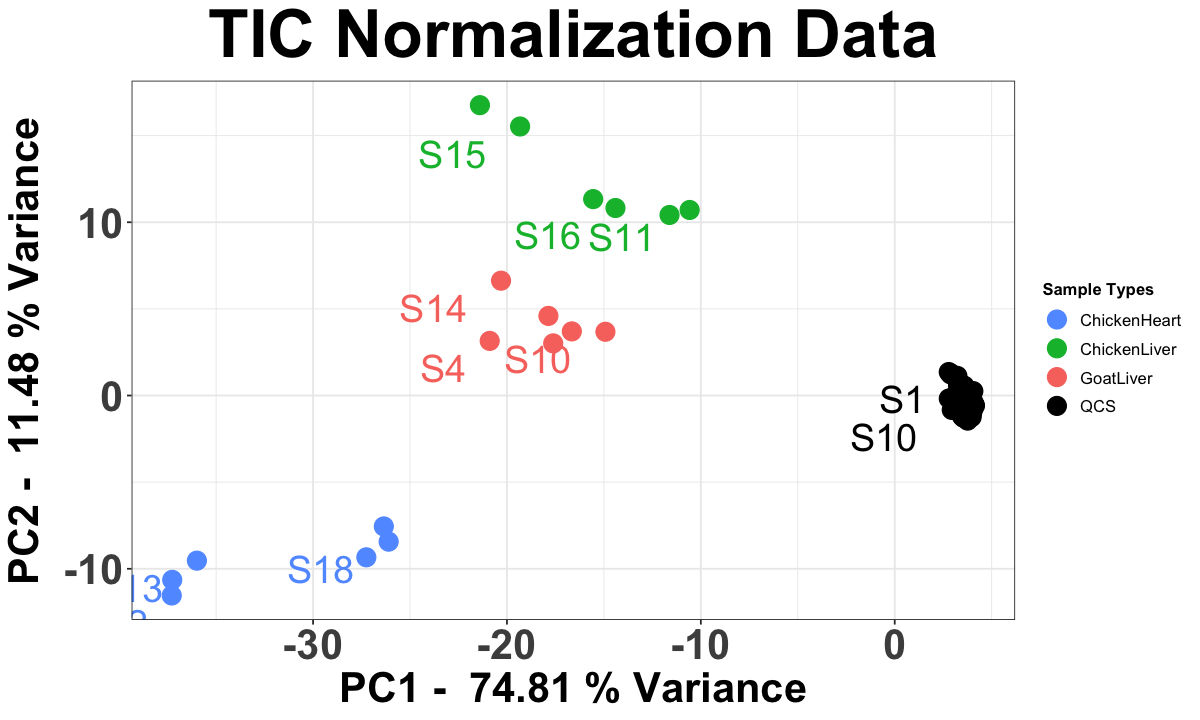

In [30]:
### Making formatted table TIC_normalization ###
# Read the CSV file
rawdata <- TIC_normalization_data_1
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df_TIC <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names
colnames(combined_batch_data_df_TIC) <- c("mz", peak_header)

# make name column
combined_batch_data_df_TIC$name <- combined_batch_data_df_TIC$mz  # Assign 'name' column which is same as mz column

# Set 'rt' column to a constant value
combined_batch_data_df_TIC$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df_TIC <- combined_batch_data_df_TIC[, c("name", "mz", "rt", peak_header)]

# uncomment to check 
#print(combined_batch_data_df)
#print(colnames(combined_batch_data_df))

## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_transposed_TIC <- as.data.frame(t(combined_batch_data_df_TIC[, -(1:3)]))
colnames(combined_batch_data_df_transposed_TIC) <- combined_batch_data_df_TIC[, 1]
combined_batch_info_data_TIC <- cbind(batch_info_1[,-1], combined_batch_data_df_transposed_TIC)  

cat("\033[1mSucessfully formatted TIC normalized datasets (check dataset folder).\033[0m\n")


## PCA plot ##
# TIC norm #
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# Format PCA plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
cat("\033[1mPCA plot for TIC normalization dataset\033[0m\n")

# Convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df_TIC %>%
  mutate_all(as.numeric)

# Extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set_1, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_TIC <- str_extract(colnames(batch_matrix), pattern)
sample_types_TIC[is.na(sample_types_TIC)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_TIC <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_TIC <- data.frame(Sample = sample_ID, batch_pca_TIC$x)

# Plot PCA with colored sample dots based on sample type
pca_data_TIC$Score <- pca_data_TIC$PC1 + pca_data_TIC$PC2
pca_data_TIC$Type <- sample_types_TIC

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_TIC$sdev[1]^2
pc2_score <- batch_pca_TIC$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_TIC$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Generate a color palette for tissue types, with "QCS" always in black
unique_types <- unique(sample_types_TIC[sample_types_TIC != "QCS"])
color_palette <- scales::hue_pal()(length(unique_types))
color_mapping <- c("QCS" = "black", setNames(color_palette, unique_types))

# PCA plot
plot_TIC <- ggplot(pca_data_TIC, aes(x = PC1, y = PC2, color = Type, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE, show.legend = FALSE) +
  xlab(paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("TIC Normalization Data") +
  labs(color = "Sample Types") + 
  scale_color_manual(values = color_mapping) +  # Apply custom colors
  theme_bw() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 10, face = 'bold'),
    legend.text = element_text(size = 10),
    axis.text = element_text(size = 25, face = 'bold'), 
    axis.title = element_text(size = 25, face = 'bold'),
    plot.title = element_text(size = 40, hjust = 0.5, face = 'bold')
  ) 
print(plot_TIC)

<p>This code below will align PCA plots next to each other to compare easier. You can also adjust the size of the PCA plot by editing the repr.plot.width and repr.plot.height values.</p>

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


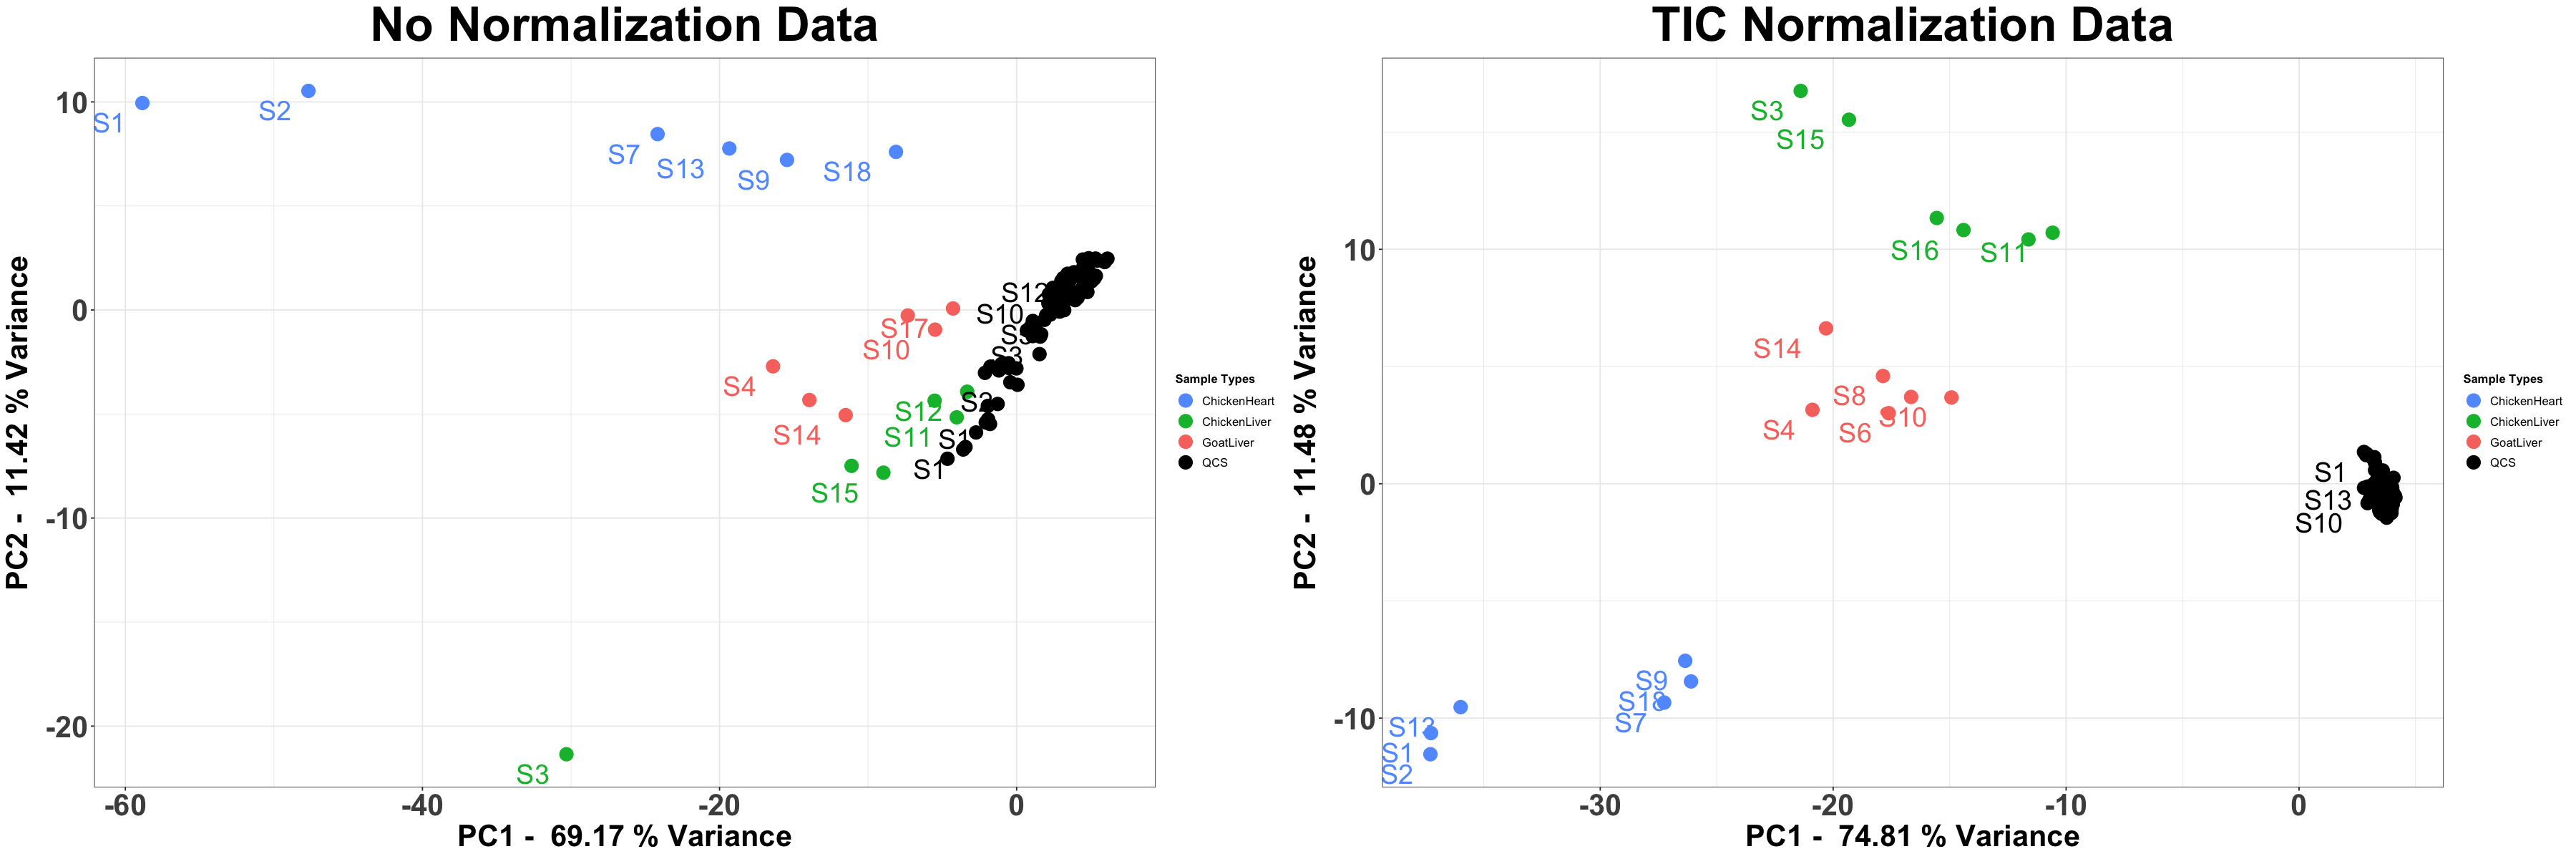

In [31]:
## Overview PCA Plot ##
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 10)
combined_plots <- grid.arrange(plot, plot_TIC, ncol = 2)
print(combined_plots)

<p>Upon comparison, we can observe that TIC normalization has altered the data structure, leading to tighter sample clustering. The QCS samples (in black) are now more closely grouped, while the tissue samples are clustered according to their respective tissue types.</p>

<h3><b>1.2 QCS PCA Plot</b></h3>
<p>To assess the QCS sample clustering in PCA plot, we calculated intragroup Euclidean Distance which is calculated by this equation:</p> 

$$
\text{Euclidean Distance} = \sqrt{(x_{i1} - c_{j1})^2 + (x_{i2} - c_{j2})^2}
$$

<p>Where \( x_{i1} \) and \( x_{i2} \) represent the coordinates of the i-th sample in the first and second principal components, while \( c_{j1} \) and \( c_{j2} \) denote the centroid of the QCS samples in the first and second principal components. The shorter intragroup distance indicates higher sample proximity within the group.</p>

QCS PCA plot for no normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.


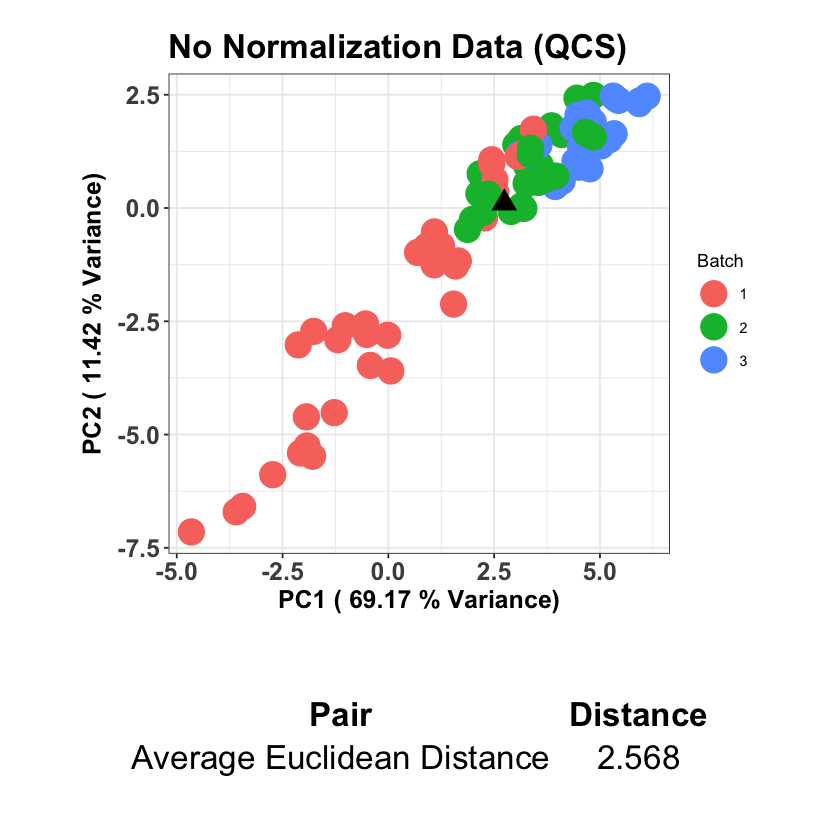

In [29]:
## PCA plot of QCS ##
# No Normalization Data #
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# Gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, 1:2] # only obtaining PC1 and PC2

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Add batch info
qcs_batch_info <- batch_info_1[qcs_samples, "batch"]

qcs_data <- data.frame(
  PC1 = qcs_scores[, 1],
  PC2 = qcs_scores[, 2],
  Batch = as.factor(qcs_batch_info)
)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2)

# Calculate distance between individuals samples and PC1 or PC2 centroids
coordinate_PC1 <- (qcs_scores[, 1] - qcs_centroid["PC1"])^2
coordinate_PC2 <- (qcs_scores[, 2] - qcs_centroid["PC2"])^2

# Add up distances of each coordinate as one and square root them
distance_from_centroid <- sqrt(coordinate_PC1 + coordinate_PC2)

# Average the distances
average_distance_ec <- mean(distance_from_centroid)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs <- ggplot(qcs_data, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point(size = 7) +  # Plot QCS samples with color based on batch number
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "black", color = "black", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "No Normalization Data (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  
        plot.title = element_text(face = "bold", size = 20))

# Creating data frame for average distance
average_distance_qcs_df <- data.frame(
    Pair = 'Average Euclidean Distance',
    Distance = round(average_distance_ec, 3)
    )
    
# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_qcs <- plot_grid(pca_plot_qcs, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

cat("\033[1mQCS PCA plot for no normalization dataset. Black triangle represents centroid of dataset. Value underneath represents average distance of QCS from centroid.\033[0m\n")

# Print the combined plot
print(combined_plot_qcs)

<p>The QCS PCA plot focuses exclusively on QCS samples to visualize their clustering. The colors represent different batches, such as Day 1, Day 2, and Day 3. The triangle in the center marks the centroid of the QCS samples. It is evident that the samples from Day 1 are more spread out compared to those from the other batches. Additionally, the average Euclidean distance is used to measure the clustering of the QCS samples, calculated by determining the distance of each QCS sample from the centroid.</p>

<h3><b>1.3 Intra and Intergroup Clustering</b></h3>
<p>Assessing sample clustering provides additional insights from PCA analysis. While PCA plots offer a visual representation of the data, evaluating intra- and inter-group clustering yields quantitative measures of group separation and cohesion. Now, we will assess the sample clustering of tissue samples in no normalization dataset. We also calculate the intra-group Euclidean Distance for tissue samples as the same way as we calculated the Euclidean Distance for QCS samples. As well, we  calculate the inter-group distance by following the equation below:</p>

$$
\text{Pair-wise Distance} = \sqrt{(c_{i1} - c_{j1})^2 + (c_{i2} - c_{j2})^2}
$$

<p>Where \( c_{i1} \) and \( c_{j1} \) represent the coordinates of the centroids of tissue types i and j on the first principal component. The \( c_{i2} \) and \( c_{j2} \) denote the coordinates of the centroids of tissue types i and j on the second principal component. The higher intergroup distance indicates a distinctive separation between different sample types.</p>


Tissue PCA plot (Intragroup) No normalization dataset. The triangles represent centroids for each tissue and average within tissue based on distance from each centroid.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


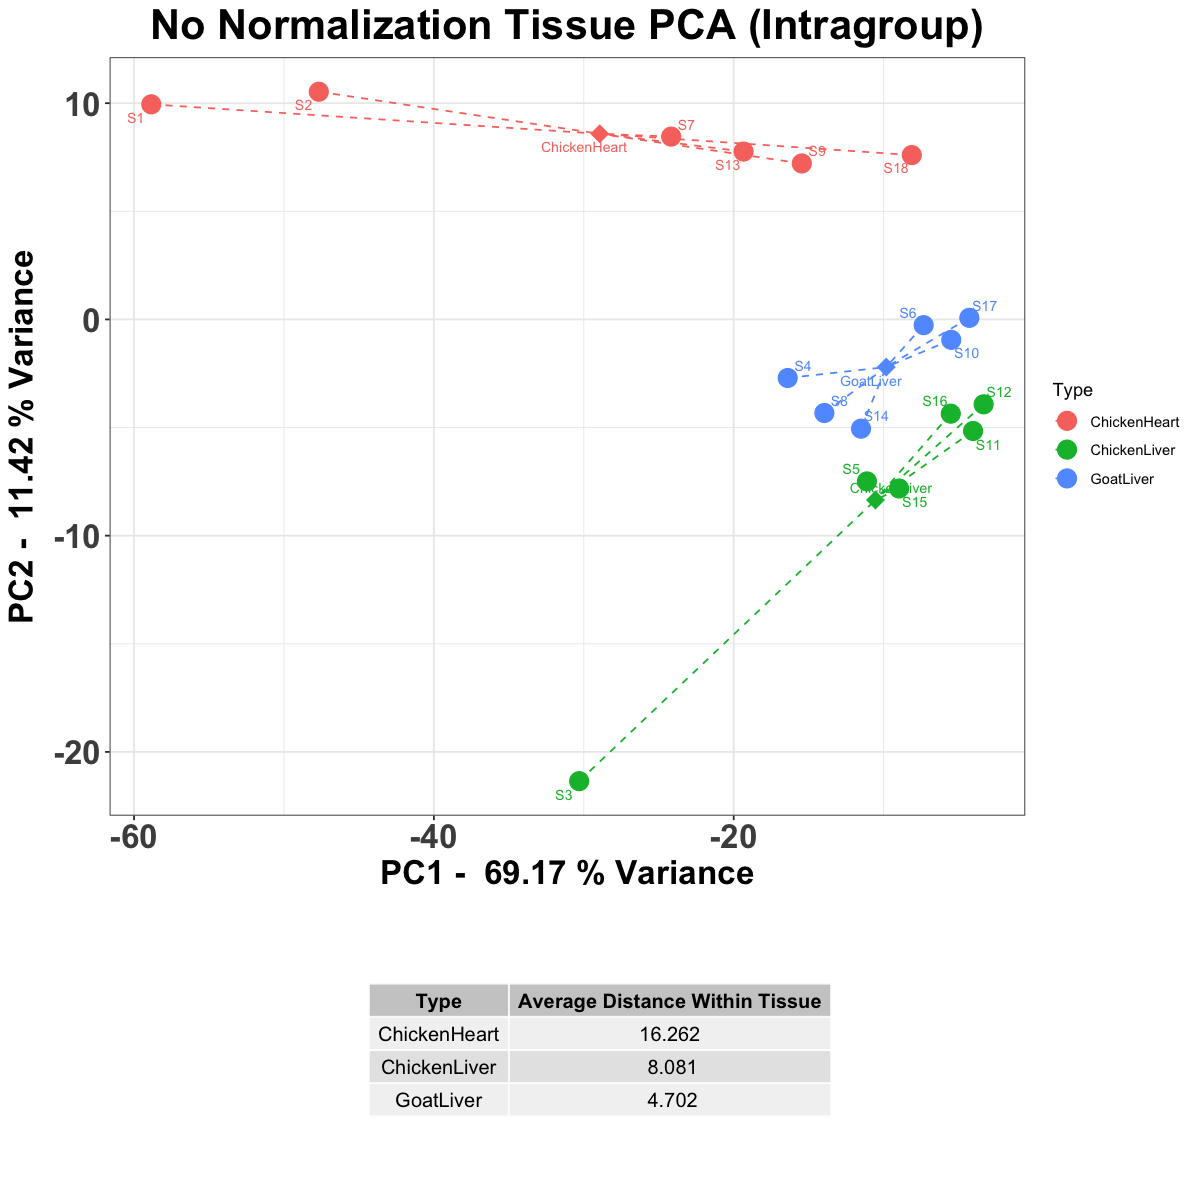

In [35]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)
library(dplyr)

# Set plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10)

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set_1)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = round(mean(distance_to_centroid), 3)) %>%
  rename('Average Distance Within Tissue' = avg_distance_within_tissue)

# Create intragroup pca plot with distance lines for visual validation
tissue_intra_plot <- ggplot(tissue_pca_data_with_centroids, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_segment(aes(x = PC1, y = PC2, xend = Centroid_PC1, yend = Centroid_PC2), linetype = "dashed") +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "No Normalization Tissue PCA (Intragroup)",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create table plot
table_plot <- tableGrob(tissue_avg_distances, rows = NULL)

# Arrange PCA plot and table plot
combined_plot_intra <- grid.arrange(tissue_intra_plot, table_plot, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intragroup) No normalization dataset. The triangles represent centroids for each tissue and average within tissue based on distance from each centroid.\033[0m\n")

# Print the combined plot
print(combined_plot_intra)

<p>With the dotted lines and centroids for each tissue type, we can more clearly visualize the clustering of tissue samples. For instance, the goat liver samples are tightly clustered compared to the chicken liver and chicken heart samples. This observation aligns with the average intragroup distance calculations, which show that goat liver has a shorter distance compared to chicken liver and chicken heart. This indicates a higher degree of sample similarity and suggests that goat liver experiences less batch effect than the other tissue types.</p>

Tissue PCA plot (Intergroup) No normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.
TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


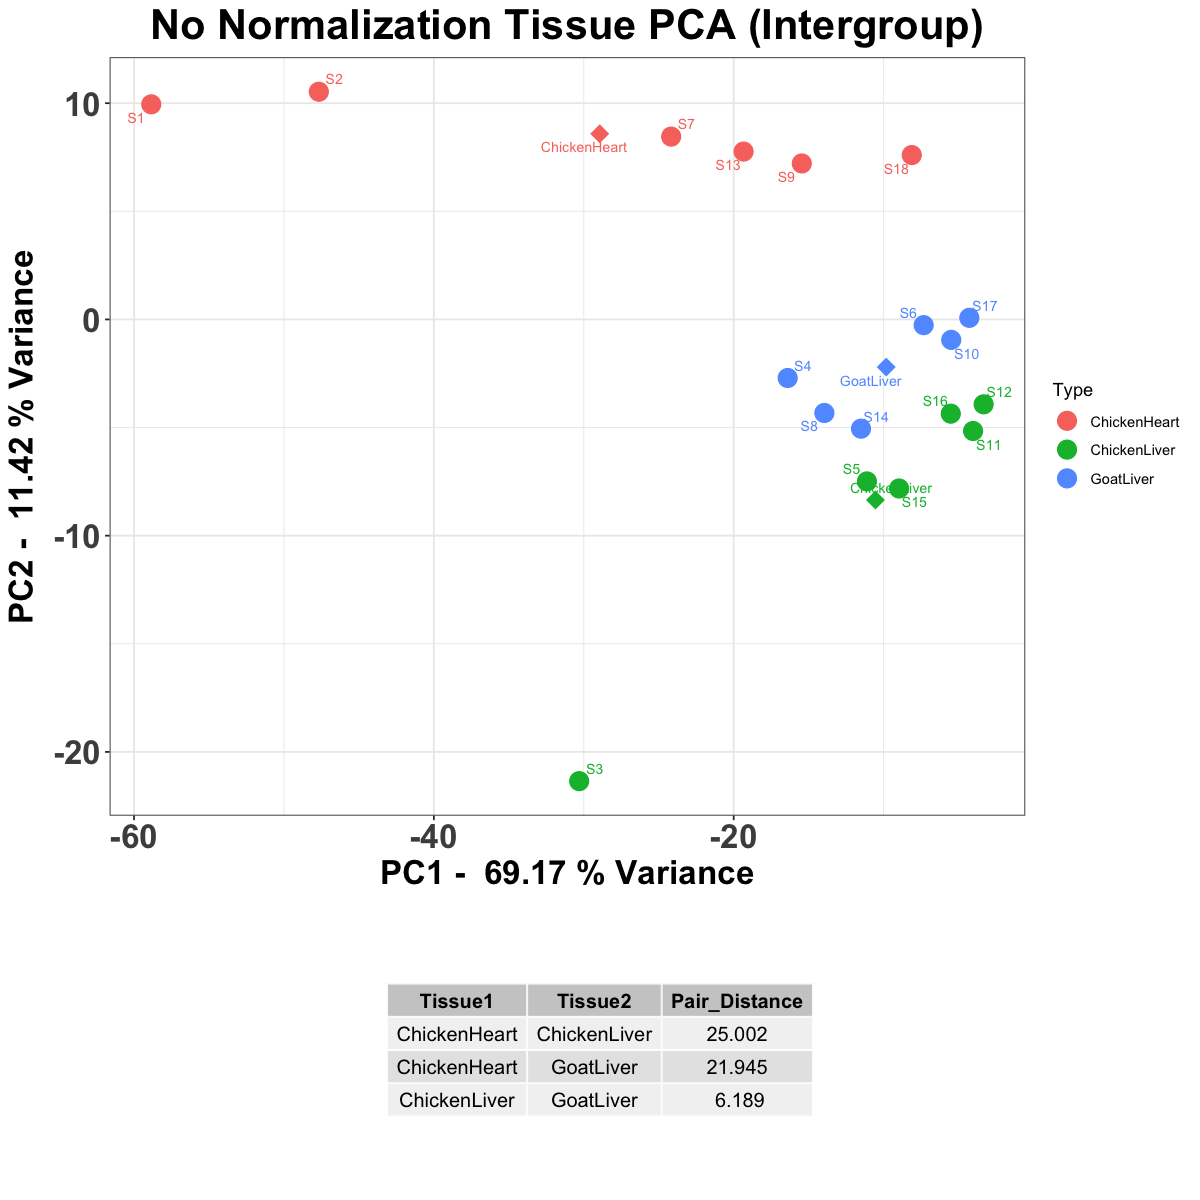

In [38]:
## Intergroup Tissue PCA Plot ##
# No Norm #
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set_1)
      
# Check if tissue_pca_data is not empty
if (nrow(tissue_pca_data) == 0) {
  stop("No tissue samples found in the given sample_set.")
}

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2)) # only obtaining PC1 and PC2

# Calculate intergroup distance (pairwise distances) # 
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df <- rbind(centroid_distances_df, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = round(distance, 3)))
}

# Create the Tissue PCA Plot
tissue_intergroup_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "No Normalization Tissue PCA (Intergroup)",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "right")

# Create a table grob for centroid distances
centroid_table <- tableGrob(centroid_distances_df, rows = NULL)

# Arrange plots and table vertically
combined_plot_inter <- grid.arrange(tissue_intergroup_plot, centroid_table, ncol = 1, heights = c(3, 1))
cat("\033[1mTissue PCA plot (Intergroup) No normalization dataset. The triangles represent centroids for each tissue and pair average of tissue based on distance from each centroid.\033[0m\n")

print(combined_plot_inter)

<p>By analyzing the centroids for each tissue type, we can effectively visualize the distinct characteristics of these tissues. For example, goat liver and chicken liver are situated closer together than chicken heart, which aligns with biological insights. This visualization also reflects the calculated intergroup distances, where the distance from chicken heart to both chicken liver and goat liver is considerably greater compared to the shorter distance between chicken liver and goat liver.</p>

<p>Thank you for completing the tutorial! We hope it has simplified your understanding of the pipeline and clarified the significance of each data analysis method and its purpose. If you have any further questions or need assistance, please don’t hesitate to reach out.</p>